# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

## 2. Load the titanic dataset from seaborn

In [2]:
titanic = sns.load_dataset('titanic')

## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [3]:
# Shape of the dataset
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [4]:
# Find missing values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

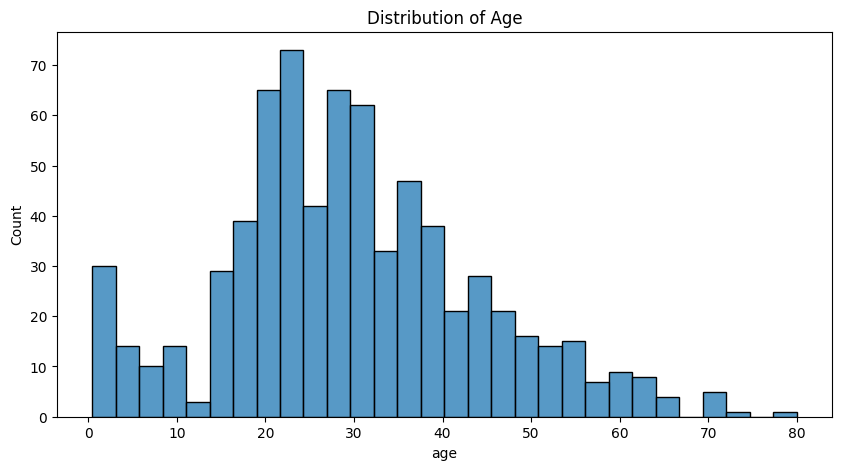

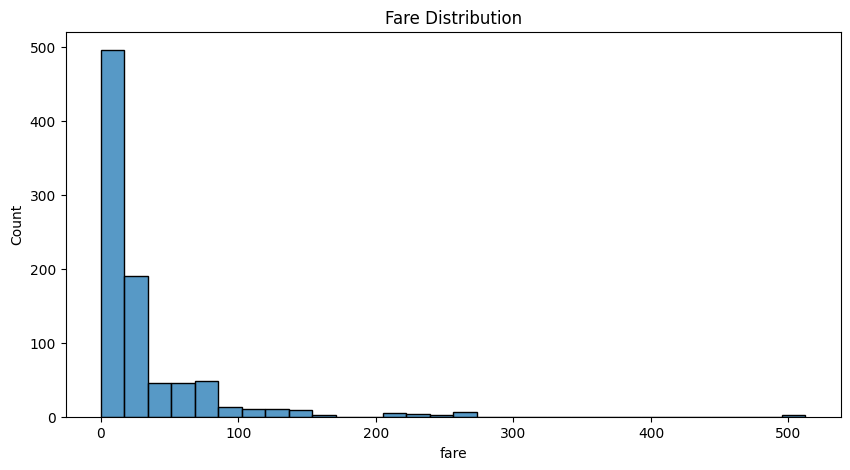

In [8]:
# Visualize distribution of numerical features such as age, fare, and survival rate by different class such as classes, gender, etc.
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(titanic['age'], bins = 30)
plt.title('Distribution of Age')
plt.show()
# Fare Distribution
plt.figure(figsize=(10, 5))
sns.histplot(titanic['fare'], bins = 30)
plt.title('Fare Distribution')
plt.show()

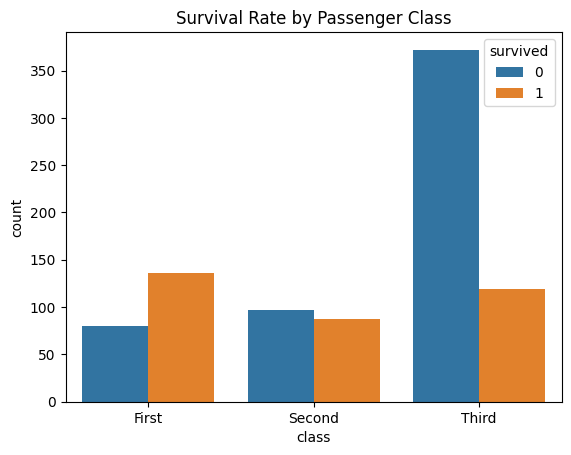

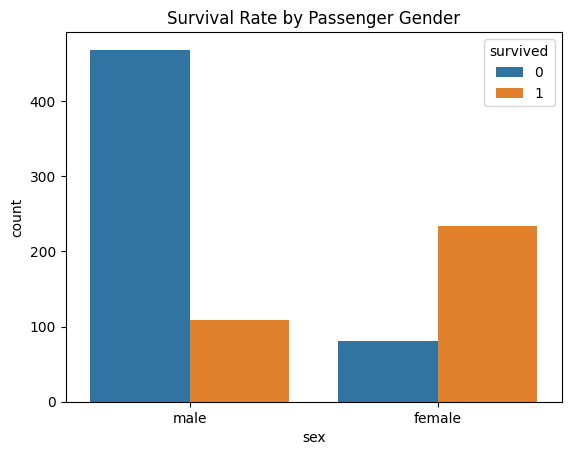

In [9]:
# Survival Rate by Class
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()
# Survival Rate by Gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Passenger Gender')
plt.show()

In [10]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']


### Split the data into training and testing sets

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [12]:
# Split between numerical and categorical features
numerical_features = ['age', 'fare', 'pclass']
categorical_features = ['sex', 'embarked', 'who', 'alone']

In [13]:
# Use StandardScalar for numerical features. Impute missing values
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

In [14]:
# Use OneHotEncoder for categorical features. Impute missing values
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Training data with multiple models

In [15]:
# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.770949720670391

Model: Random Forest
Accuracy: 0.8100558659217877

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8212290502793296

Model: Gradient Boosting
Accuracy: 0.8379888268156425


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
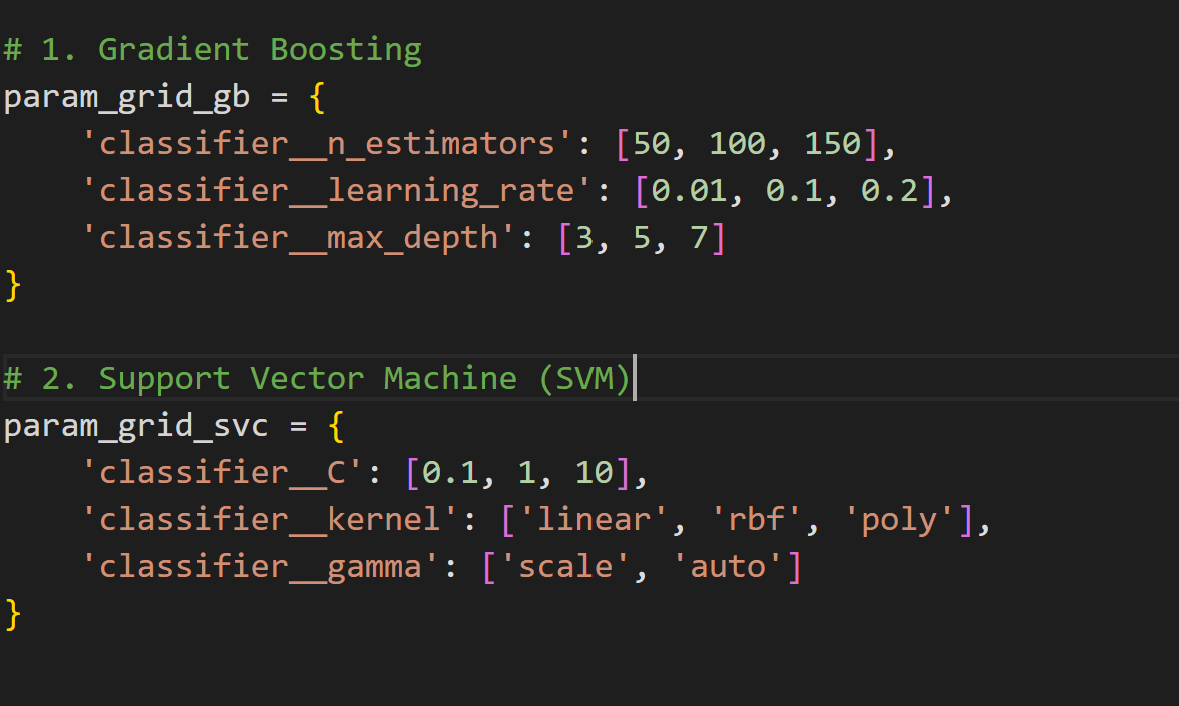

In [19]:
# Define parameter grids for the top Bagging Classifier model and the Gradient Boosting model
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 4],
    'classifier__subsample': [0.8, 0.9, 1.0]
}
param_grid_bagging = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_samples': [0.5, 0.7, 1.0],
    'classifier__max_features': [0.5, 0.7, 1.0],
    'classifier__bootstrap': [True, False],
    'classifier__bootstrap_features': [True, False]
}

## List of models and their corresponding parameter grids
Example
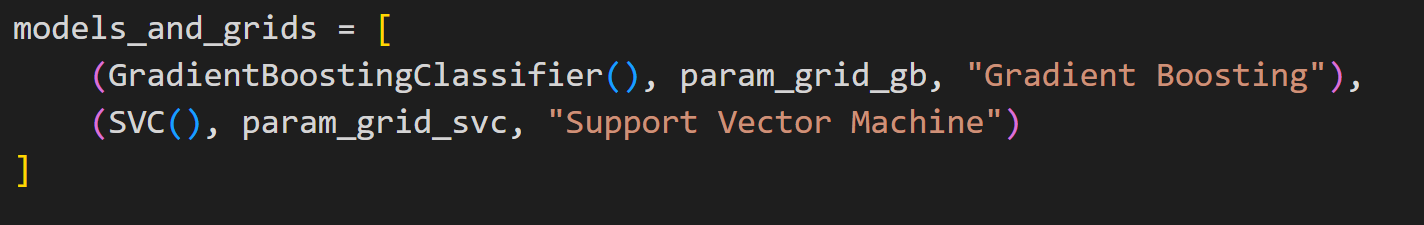

In [20]:
models_and_grids = [
    (GradientBoostingClassifier(random_state=42), param_grid_gb, 'Gradient Boosting'),
    (BaggingClassifier(random_state=42), param_grid_bagging, 'Bagging Classifier')
]

In [21]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best cross-validation accuracy for Gradient Boosting: 0.8357

Best parameters for Bagging Classifier: {'classifier__bootstrap': True, 'classifier__bootstrap_features': True, 'classifier__max_features': 1.0, 'classifier__max_samples': 0.5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Bagging Classifier: 0.8356


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

- Before hyperparameter tuning the best performing model was the Gradient Boosting Classifier with an initial accuracy of 83.80%. This model performed well with its default parameters.
- The two best top performing models were the Gradient Boosting Classifier model and the Bagging Classifier model. The Gradient Boosting Classifier had an initial accuracy of 83.80% before tuning and an accuracy of 83.57% after tuning which is a change of -0.23%. The Basgging Classifier model had an initial accuracy of 82.12% and an accuracy of 83.56% after tuning which is a change of +1.44%.
- Given the above comparison of the before and after tuning accuracy scores of the top two models, the model that showed most improvment was the Bagging Classifier model. The Gradient Boosting Classifier model showed a good accuracy score without much change. After hyperparameter tuning, both of the models had a similar accuracy score.
- The optimal parameters found during hyperparameter tuning for the Gradient Boosting Classifier model were:
{
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_samples_split': 4,
    'n_estimators': 200,
    'subsample': 1.0
}.
The learning_rate was lower than the default 0.1, the max_depth was higher than the default of 3, the min_samples_split was higher than the default of 4, the n_estimators was double the default of 100, and the subsample was used to the maximum.
- The optimal parameters found during hyperparameter tuning for the Bagging Classifier model were:
{
    'bootstrap': True,
    'bootstrap_features': True,
    'max_features': 1.0,
    'max_samples': 0.5,
    'n_estimators': 200
}.
The bootstrap_features was set to true rather than the default of false, the max_samples was lowered to 0.5 from the default of 1.00, and the n_estimators was increased to 200 from the default of 10.
- The cross validation scores of both models show that they both have very similar model performance with the Gradient Boosting Classifier being marginally better. They do not show any signs of overfitting either which is ideal. I would select the Gradient Boosting Classifier for deployment since it has marginally higher performance and it maintained model performance from before and after hyperparameter tuning. In addition, the Gradient Boosting Classifier gives more control over the model since it has more hyperparameters than the Bagging Classifier.